In [21]:
import numpy as np
import itk
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
# Normalize array from 0 to 1
def normalize(target_array):
    target_array -= target_array.min()
    normalized_array = np.divide(target_array, target_array.max())
    return normalized_array

def show_slice(img, slice_no):
    """
        Inputs: img (nibabel): image name
                slice_no (np slice): np.s_[:, :, 30]
        """
    plt.figure()
    plt.imshow(img[slice_no].T, cmap='gray')
    plt.show()
    
def load(path_img):
    """
        Inputs: path_img (string): path to test image
        Returns: img (ITK): ITK image
                 img_data(np.array): image data
        """
    pixel_type = itk.ctype('unsigned short')
    img = itk.imread(path_img, pixel_type)
    img_data = itk.GetArrayFromImage(img1)
    return img, img_data

def load_normalize(path_img):
    """
        Inputs: path_img (string): path to test image
        Returns: img (ITK): ITK image
                 img_data(np.array): image data
        """
    img, img_data = load(path_img)
    img_data = normalize(img_data)
    return img, img_data

def save_itk(arr, hdr, filename):
    """
    Image saver using the third-party module itk.
    @param arr the image data
    @param hdr the image header with met-information
    @param filename the target location
    """

    logger = Logger.getInstance()
    logger.debug('Saving image as {} with Itk...'.format(filename))

    # convert array to itk image
    try:
        img = itk.GetImageFromArray(arr)
    except KeyError:
        raise DependencyError('The itk python PyBuffer transition object was compiled without support for image of type {}.'.format(image_type))

    # if original image object was provided with hdr, try to use it for creating the image object
    if __is_header_itk(hdr):
        # save original image shape / largest possible region
        shape = []
        for i in range(img.GetLargestPossibleRegion().GetImageDimension()):
            shape.append(img.GetLargestPossibleRegion().GetSize().GetElement(i))

        # copy meta data
        try:
            img.CopyInformation(hdr.GetPointer())
            # reset largest possible region / shape to original value
            for i in range(len(shape)):
                img.GetLargestPossibleRegion().GetSize().SetElement(i, shape[i])
        except RuntimeError as e: # raised when the meta data information could not be copied (e.g. when the two images ndims differ)
            logger.debug('The meta-information could not be copied form the old header. CopyInformation signaled: {}.'.format(e))
            pass
        
    elif hdr: # otherwise copy meta-data information as far as possible
        copy_meta_data(img, hdr)
    
    # save the image
    writer = itk.ImageFileWriter[image_type].New()
    writer.SetFileName(filename)
    writer.SetInput(img.GetPointer())
    writer.Update()


In [97]:
# Set path to test files and import
chosen_im = 'copd1'

# Set path to data folder containing copd1, copd2, etc. folders
data_dir = "../data"

#Set paths to images
path_img1 = os.path.join(data_dir, f'./{chosen_im}/{chosen_im}_eBHCT.mha')
path_img2 = os.path.join(data_dir, f'./{chosen_im}/{chosen_im}_iBHCT.mha')

In [101]:
img, img_data = load_normalize(path_img2)
img_data.astype('float32').tofile(f'../data/{chosen_im}/{chosen_im}_iBHCT_norm.img')

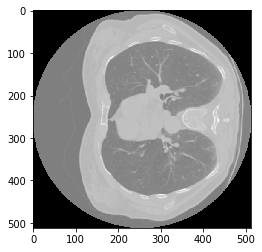

In [99]:
show_slice(img_data, np.s_[61,:,:])

In [90]:
np.min(img_data)

0.0

In [60]:
os.path.join(data_dir, f'{chosen_im}/{chosen_im}_eBHCT_norm.mha')

'../data/copd1/copd1_eBHCT_norm.mha'

In [64]:
help(itk.imwrite)

Help on function imwrite in module itkExtras:

imwrite(imageOrFilter, fileName, compression=False)
    Write a image or the output image of a filter to a file.
    
    The writer is instantiated with the image type of the image in
    parameter (or, again, with the output image of the filter in parameter).



In [66]:
img_norm.Graft(img)

TypeError: in method 'itkImageD3_Graft', argument 2 of type 'itkImageD3 const *'

In [94]:
pixel_type = itk.ctype('unsigned short')
img1 = itk.imread(path_img1, pixel_type)
img_data = itk.GetArrayFromImage(img1)
img_data = normalize(img_data)

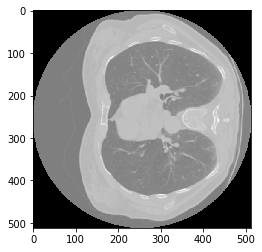

In [95]:
show_slice(img_data, np.s_[61,:,:])

In [77]:
np.max(img_data)

1.0

In [78]:
np.min(img_data)

0.0

In [79]:
img_norm.Graft(img1)

TypeError: in method 'itkImageD3_Graft', argument 2 of type 'itkImageD3 const *'

In [80]:
import medpy

In [81]:
image_data, hdr = medpy.io.load.load(path_img1)

AttributeError: module 'medpy' has no attribute 'io'

In [82]:
medpy.io

AttributeError: module 'medpy' has no attribute 'io'